## (Rep2) 트위터 API로 연관 키워드 분석하기  - Rep2(202020563 이선아)

-----

In [1]:
!pip install pandas numpy matplotlib

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. API 호출> : 트위터 API로 데이터 가져오기

### [API 데이터로 데이터 프레임 생성하기]
- API 사용법 참고 : https://github.com/yoonkt200/python-data-analysis/blob/master/chapter_text/(%EC%B0%B8%EA%B3%A0)%20using-twitter-api.ipynb
- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install tweepy`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [3]:
!pip install tweepy

In [4]:
import tweepy

-----

##### 트위터 API 가져오기

In [5]:
# 발급받은 Auth key 입력
CONSUMER_KEY = "ayI3DLd7Wpy1ujS8hNxcc24nV"
CONSUMER_SECRET = "GjJSid7X0rMzHGrJTe1ogLQLR5EfmYf9d2BdFgllDbA4DMD6E5"
ACCESS_TOKEN_KEY = "1399524790797406217-HWAnhcCVkPnV7HwZzd7IyP1chNz530"
ACCESS_TOKEN_SECRET = "eQ6F21LLpmA9Mklq5fDOW6HP5Gk89WmAJ1jr5R46LHL1C"

# 개인정보 인증을 요청하는 Handler입니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행합니다.
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비입니다.
api = tweepy.API(auth)

-----

##### 관심키워드 '비트코인' 키워드 검색

In [73]:
keyword = "비트코인'"
tweets = api.search(keyword)
for tweet in tweets:
    print(tweet.text)
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.created_at)

액션물 애니 볼 때마다 느끼는 건데 왤케 좆밥인 애들이 세계관 최강자에게 덤비는 거냐 정의 ㅇㅈㄹ 하면서 니네는 걍 집에서 집안일이나 하며 비트코인 시세 보는 게 세상에 도움 주는 일인데
[]
[]
2021-06-03 13:42:25
멈~ 추지않는 코인 어디서 본듯 like 비트코인
신화 - Touch
[]
[]
2021-06-03 13:41:57
RT @welchsbinn: 우리조상님들은 이런 계산기액정 비슷한걸로 게임을 했었읍니다 그래도 여기서 온갖 명작이 나왔죠. 포켓몬도 그렇고

그리고 이걸로 비트코인 채굴을하는사람도있군요 https://t.co/RaWSp4o1cQ
[{'screen_name': 'welchsbinn', 'name': 'WelchsBinn', 'id': 1928583404, 'id_str': '1928583404', 'indices': [3, 14]}]
[]
2021-06-03 13:39:52
문호주식
광주대전울산제주
경산당구
청송알바
영양비트코인
수화스포프
서울부산대구인천
문경창원만남
롯데타워주식거레
군위축구
세종경기강원강남
시리재테크
신외배구
원천고수익
서울노출
의성증권
attach15942 https://t.co/3CTO3wLy46
[]
[]
2021-06-03 13:38:27
RT @ho_whatsup: https://t.co/pTIH47I0R7
호두냥 15깅 폼입니당 내일 밤 9시에용😁

옷 가격을 아직 몰라서 지금은 호두냥만 넣어뒀는데 옷가격받으면 옷도 추가할 생각이에용
지금 비트코인때문에😂 모두 받을 상황이 안돼용😭…
[{'screen_name': 'ho_whatsup', 'name': '호이짜', 'id': 1159742265121624064, 'id_str': '1159742265121624064', 'indices': [3, 14]}]
[]
2021-06-03 13:36:51
부동산
섹트
누드사진
일수
주식증권
축구
노출
창원만남
고수익
토토
sm
영통
비트코인
라인
투자
주인님
스포프
노예
당구
주식거레
알바
재테크


-----

##### 데이터 프레임 형태로 수집

In [74]:
# 크롤링된 데이터를 저장할 데이터 프레임입니다.
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# twitter API를 사용하여 ‘백신’이 포함된 100페이지의 트윗들을 크롤링한 뒤, ‘text’, ‘created_at’ 정보를 데이터 프레임으로 저장합니다.
for i in range(1,100):
    print("Get data", str(i/500*100), "% complete..")
    tweets = api.search(keyword)
    for tweet in tweets:
        tweet_text = tweet.text
        created = tweet.created_at
        row = [created, tweet_text]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
print("Get data 100 % complete..")

Get data 0.2 % complete..
Get data 0.4 % complete..
Get data 0.6 % complete..
Get data 0.8 % complete..
Get data 1.0 % complete..
Get data 1.2 % complete..
Get data 1.4000000000000001 % complete..
Get data 1.6 % complete..
Get data 1.7999999999999998 % complete..
Get data 2.0 % complete..
Get data 2.1999999999999997 % complete..
Get data 2.4 % complete..
Get data 2.6 % complete..
Get data 2.8000000000000003 % complete..
Get data 3.0 % complete..
Get data 3.2 % complete..
Get data 3.4000000000000004 % complete..
Get data 3.5999999999999996 % complete..
Get data 3.8 % complete..
Get data 4.0 % complete..
Get data 4.2 % complete..
Get data 4.3999999999999995 % complete..
Get data 4.6 % complete..
Get data 4.8 % complete..
Get data 5.0 % complete..
Get data 5.2 % complete..
Get data 5.4 % complete..
Get data 5.6000000000000005 % complete..
Get data 5.800000000000001 % complete..
Get data 6.0 % complete..
Get data 6.2 % complete..
Get data 6.4 % complete..
Get data 6.6000000000000005 % comp

In [75]:
df.to_csv("tweet_temp.csv", index=False)

-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]

In [76]:
df = pd.read_csv("tweet_temp.csv")
df.head()

,created,tweet_text
0,2021-06-03 13:42:25,액션물 애니 볼 때마다 느끼는 건데 왤케 좆밥인 애들이 세계관 최강자에게 덤비는 거...
1,2021-06-03 13:41:57,멈~ 추지않는 코인 어디서 본듯 like 비트코인\n신화 - Touch
2,2021-06-03 13:39:52,RT @welchsbinn: 우리조상님들은 이런 계산기액정 비슷한걸로 게임을 했었읍...
3,2021-06-03 13:38:27,문호주식\n광주대전울산제주\n경산당구\n청송알바\n영양비트코인\n수화스포프\n서울부...
4,2021-06-03 13:36:51,RT @ho_whatsup: https://t.co/pTIH47I0R7\n호두냥 1...


In [77]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [78]:
# ‘tweet_text’ 피처에 이를 적용합니다.
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2021-06-03 13:42:25,액션물 애니 볼 때마다 느끼는 건데 왤케 좆밥인 애들이 세계관 최강자에게 덤비는 거...,액션물 애니 볼 때마다 느끼는 건데 왤케 좆밥인 애들이 세계관 최강자에게 덤비는 거...
1,2021-06-03 13:41:57,멈~ 추지않는 코인 어디서 본듯 like 비트코인\n신화 - Touch,멈 추지않는 코인 어디서 본듯 비트코인신화
2,2021-06-03 13:39:52,RT @welchsbinn: 우리조상님들은 이런 계산기액정 비슷한걸로 게임을 했었읍...,우리조상님들은 이런 계산기액정 비슷한걸로 게임을 했었읍니다 그래도 여기서 온갖 ...
3,2021-06-03 13:38:27,문호주식\n광주대전울산제주\n경산당구\n청송알바\n영양비트코인\n수화스포프\n서울부...,문호주식광주대전울산제주경산당구청송알바영양비트코인수화스포프서울부산대구인천문경창원만남롯...
4,2021-06-03 13:36:51,RT @ho_whatsup: https://t.co/pTIH47I0R7\n호두냥 1...,호두냥 깅 폼입니당 내일 밤 시에용옷 가격을 아직 몰라서 지금은 호두냥만 넣어뒀...


-----

In [21]:
# from konlpy.tag import Kkma
# from konlpy.utils import pprint
# kkma = Kkma()
# pprint(kkma.nouns(u'드디어 오류 없이 잘 실행됩니다. 오늘은 여기까지 안녕'))

['오류', '실행', '오늘', '여기', '안녕']


### [konlpy를 이용한 키워드 추출]

In [79]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [80]:
# ‘ko_text’ 피처에 이를 적용합니다.
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(1485, 4)


,created,tweet_text,ko_text,nouns
0,2021-06-03 13:42:25,액션물 애니 볼 때마다 느끼는 건데 왤케 좆밥인 애들이 세계관 최강자에게 덤비는 거...,액션물 애니 볼 때마다 느끼는 건데 왤케 좆밥인 애들이 세계관 최강자에게 덤비는 거...,"[액션, 애니, 왤케, 좆밥, 세계관, 최강, 정의, 집안일, 비트코인, 시세, 세..."
1,2021-06-03 13:41:57,멈~ 추지않는 코인 어디서 본듯 like 비트코인\n신화 - Touch,멈 추지않는 코인 어디서 본듯 비트코인신화,"[코인, 비트코인, 신화]"
2,2021-06-03 13:39:52,RT @welchsbinn: 우리조상님들은 이런 계산기액정 비슷한걸로 게임을 했었읍...,우리조상님들은 이런 계산기액정 비슷한걸로 게임을 했었읍니다 그래도 여기서 온갖 ...,"[조상, 계산기, 액정, 게임, 읍니, 온갖, 명작, 포켓몬, 비트코인, 채굴, 사람]"
3,2021-06-03 13:38:27,문호주식\n광주대전울산제주\n경산당구\n청송알바\n영양비트코인\n수화스포프\n서울부...,문호주식광주대전울산제주경산당구청송알바영양비트코인수화스포프서울부산대구인천문경창원만남롯...,"[호주, 광주대, 울산, 경산, 청송, 알바, 비트코인, 수화, 스포, 서울, 부산..."
4,2021-06-03 13:36:51,RT @ho_whatsup: https://t.co/pTIH47I0R7\n호두냥 1...,호두냥 깅 폼입니당 내일 밤 시에용옷 가격을 아직 몰라서 지금은 호두냥만 넣어뒀...,"[호두, 내일, 용옷, 가격, 지금, 호두, 가격, 추가, 생각, 용지, 비트코인,..."


-----

# <Step3. 분석> : 연관 분석을 이용한 키워드 분석

### [연관 키워드 추출하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install apriori apyori`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [81]:
!pip install apriori apyori

##### 연관 분석 연습

In [83]:
from apyori import apriori

# 장바구니 형태의 데이터(트랜잭션 데이터)를 생성합니다.
transactions = [
    ['비트코인', '이더리움'],
    ['암호화폐', '가상자산'],
    ['비트코인', '머스크', '급락'],
]

# 연관 분석을 수행합니다.
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'가상자산'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'가상자산'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'급락'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'급락'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'머스크'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'머스크'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'비트코인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'비트코인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'암호화폐'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'암호화폐'}), confidence=0.33333333333

In [84]:
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 규칙의 크기가 2 이하인 규칙을 추출합니다.
list(apriori(transactions,
             min_support=0.5,
             min_confidence=0.6,
             min_lift=1.0,
             max_length=2))

[RelationRecord(items=frozenset({'비트코인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'비트코인'}), confidence=0.6666666666666666, lift=1.0)])]

-----

##### 트위터 연관 키워드 분석

In [85]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
print(transactions)

[['액션', '애니', '왤케', '좆밥', '세계관', '최강', '정의', '집안일', '비트코인', '시세', '세상', '도움'], ['코인', '비트코인', '신화'], ['조상', '계산기', '액정', '게임', '읍니', '온갖', '명작', '포켓몬', '비트코인', '채굴', '사람'], ['호주', '광주대', '울산', '경산', '청송', '알바', '비트코인', '수화', '스포', '서울', '부산', '대구인', '문경', '창원', '만남', '롯데', '타워', '주식', '거레', '군위', '축구', '세종', '기강', '강남', '시리', '재테크', '배구', '원천', '수익', '서울', '노출', '의성', '증권'], ['호두', '내일', '용옷', '가격', '지금', '호두', '가격', '추가', '생각', '용지', '비트코인', '때문', '상황'], ['부동산', '섹트', '누드사진', '주식', '증권', '축구', '노출', '창원', '만남', '수익', '토토', '영통', '비트코인', '라인', '투자', '주인', '스포', '노예', '구주', '레알', '재테크', '카톡', '마사지', '배구'], ['역시', '엔비디아', '암호', '화폐', '시장', '포기', '채굴', '상품', '코인', '시장', '활성화', '팹리스', '반도체', '최강', '코인', '시장', '결코', '비트코인', '상품', '출시'], ['현재', '요호', '현황', '레이', '비트코인', '지지', '발언', '비트코인', '컨퍼런스', '루트', '구글', '가상', '화폐', '광고', '재개', '애플', '암호', '화폐', '경력', '채용', '공고', '코인', '베이스', '카드'], ['비트코인', '라면'], ['카카오', '적량', '아화', '제네시스', '안성', '로스트', '아크', '서울', '월드컵', '광주', '시리즈', '어금니', '세종', '기강

In [86]:
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
                       min_support=0.1,
                       min_confidence=0.2,
                       min_lift=5,
                       max_length=2))
print(results)

[RelationRecord(items=frozenset({'광주대', '강남'}), support=0.13333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'강남'}), items_add=frozenset({'광주대'}), confidence=1.0, lift=7.5), OrderedStatistic(items_base=frozenset({'광주대'}), items_add=frozenset({'강남'}), confidence=1.0, lift=7.5)]), RelationRecord(items=frozenset({'기강', '강남'}), support=0.13333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'강남'}), items_add=frozenset({'기강'}), confidence=1.0, lift=7.5), OrderedStatistic(items_base=frozenset({'기강'}), items_add=frozenset({'강남'}), confidence=1.0, lift=7.5)]), RelationRecord(items=frozenset({'대구인', '강남'}), support=0.13333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'강남'}), items_add=frozenset({'대구인'}), confidence=1.0, lift=7.5), OrderedStatistic(items_base=frozenset({'대구인'}), items_add=frozenset({'강남'}), confidence=1.0, lift=7.5)]), RelationRecord(items=frozenset({'부산', '강남'}), support=0.13333333333333333, ordered_s

In [87]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,광주대,강남,0.133333
1,기강,강남,0.133333
2,대구인,강남,0.133333
3,부산,강남,0.133333
4,서울,강남,0.133333


-----

### [단어 빈도 추출하기]

##### 말뭉치 추출

In [88]:
# 말뭉치를 추출합니다.
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

액션물 애니 볼 때마다 느끼는 건데 왤케 좆밥인 애들이 세계관 최강자에게 덤비는 거냐 정의 ㅇㅈㄹ 하면서 니네는 걍 집에서 집안일이나 하며 비트코인 시세 보는 게 세상에 도움 주는 일인데멈 추지않는 코인 어디서 본듯  비트코인신화    우리조상님들은 이런 계산기액정 비슷한걸로 게임을 했었읍니다 그래도 여기서 온갖 명작이 나왔죠 포켓몬도 그렇고그리고 이걸로 비트코인 채굴을하는사람도있군요 문호주식광주대전울산제주경산당구청송알바영양비트코인수화스포프서울부산대구인천문경창원만남롯데타워주식거레군위축구세종경기강원강남시리재테크신외배구원천고수익서울노출의성증권   호두냥 깅 폼입니당 내일 밤 시에용옷 가격을 아직 몰라서 지금은 호두냥만 넣어뒀는데 옷가격받으면 옷도 추가할 생각이에용지금 비트코인때문에 모두 받을 상황이 안돼용부동산섹트누드사진일수주식증권축구노출창원만남고수익토토영통비트코인라인투자주인님스포프노예당구주식거레알바재테크카톡마사지배구   역시 엔비디아는 암호화폐 시장을 포기하지 않을 것이며 결국 채굴용 상품을 만들어 코인시장을 활성화시키고자 할 것입니다 팹리스 반도체 최강자가 떠받치는 코인시장은 결코 망할수가 없고 곧 비트코인용 상품도 출시할거라고 봅니다  월 말 월 현재 주요호재 현황 레이달리오 비트코인 지지 발언  비트코인 컨퍼런스  탭루트  이상 구글 가상화폐 광고 재개 애플 암호화폐 경력자 채용공고 코인베이스카드 저게 비트코인이라면이천카카오적량기아화성제네시스안성로스트아크서울월드컵광주시리즈월하어금니세종경기강원강남김포태풍평여시리즈해산천애명월도광주대전울산제주화치비트코인서울부산대구인천 제네시스비트코인모하비어금니천애명월도시리즈기아번개장터태풍가상화폐싼타페시리즈월드컵카카오그림쟁이그림스타그램그래픽그런지록그레이스펌 비트코인 가상화폐 선물옵션 바이너리 거래의시작 비트코인거래소 비트코인는 오를때도 내릴때도 수익을 창출하세요     비트코인선물 가상화폐 선물옵션 바이너리 거래의시작 선물 비트코인선물 오를때도 내릴때도 수익을 창출하세요     비트코인 가상화폐 선물옵션 바이너리 거래의시작 비트코

In [89]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'비트코인': 2183, '화폐': 693, '수익': 547, '가상': 495, '바이너리': 401, '코인': 396, '서울': 396, '시리즈': 396, '선물': 396, '선물옵션': 349, '거래': 349, '시작': 349, '시장': 297, '최강': 198, '채굴': 198, '광주대': 198, '울산': 198, '스포': 198, '부산': 198, '대구인': 198, '창원': 198, '만남': 198, '주식': 198, '축구': 198, '세종': 198, '기강': 198, '강남': 198, '재테크': 198, '배구': 198, '노출': 198, '증권': 198, '호두': 198, '가격': 198, '암호': 198, '상품': 198, '카카오': 198, '제네시스': 198, '월드컵': 198, '어금니': 198, '태풍': 198, '명월': 198, '그림': 198, '부동산': 146, '선물거래': 104, '액션': 99, '애니': 99, '왤케': 99, '좆밥': 99, '세계관': 99, '정의': 99, '집안일': 99, '시세': 99, '세상': 99, '도움': 99, '신화': 99, '우리': 99, '조상': 99, '계산기': 99, '액정': 99, '게임': 99, '읍니': 99, '여기': 99, '온갖': 99, '명작': 99, '포켓몬': 99, '사람': 99, '호주': 99, '경산': 99, '청송': 99, '알바': 99, '수화': 99, '문경': 99, '롯데': 99, '타워': 99, '거레': 99, '군위': 99, '시리': 99, '원천': 99, '의성': 99, '내일': 99, '용옷': 99, '지금': 99, '추가': 99, '생각': 99, '용지': 99, '때문': 99, '모두': 99, '상황': 99, '섹트': 99, '누드사진': 99, '토토': 99, '영통': 99, '라

-----

##### 단어 빈도 점수 추가

In [90]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거합니다.
node_df.head()

,node,nodesize
0,액션,99
1,애니,99
2,왤케,99
3,좆밥,99
4,세계관,99


-----

# <Step4. 시각화> : 연관 키워드 네트워크 시각화

### [연관 키워드 네트워크 시각화]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install networkx`
- 혹은 아래의 코드로 라이브러리를 설치합니다.
- networkx 버전 2.3 이하를 설치하는 경우, 아래 코드를 다음과 같이 바꿔주어야 합니다.
    - `sizes = [G.nodes[node]['nodesize']*25 for node in G]` -> `sizes = [G.node[node]['nodesize']*25 for node in G]`

In [91]:
!pip install networkx

-----

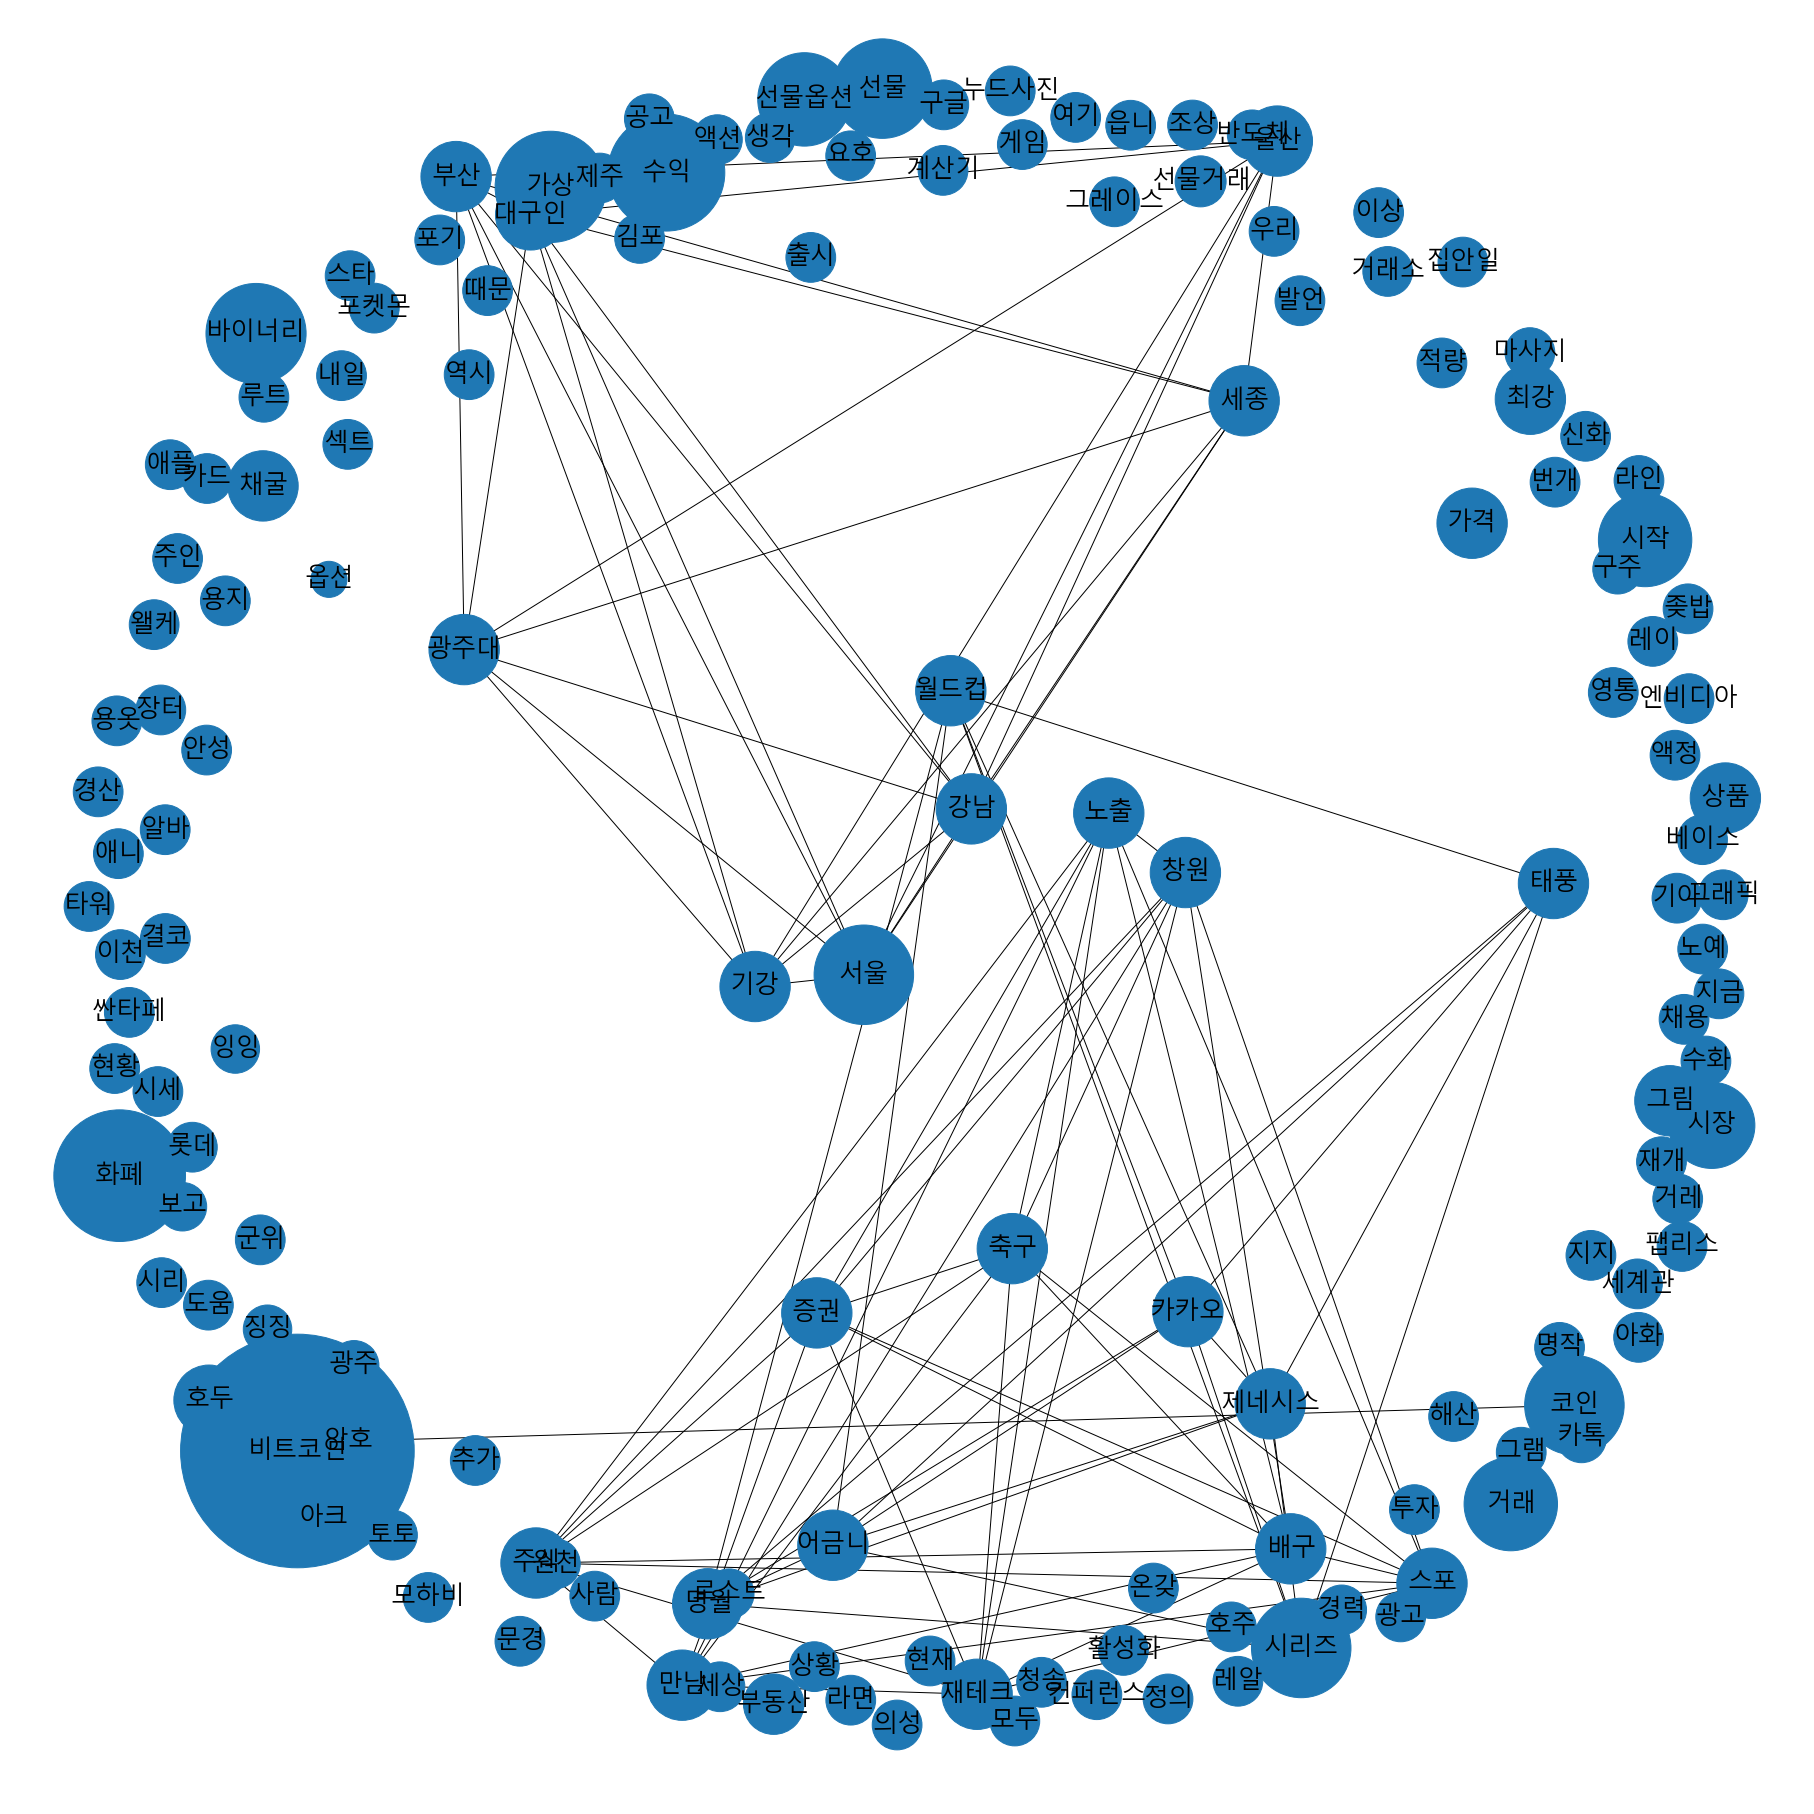

In [92]:
import networkx as nx
plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

# Windows 사용자는 AppleGothic 대신,'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력합니다.
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()